In [3]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import h5py

In [30]:
def recursive_hdf5_to_dict(hdf5):
    _dict = {}
    for k in hdf5:
        if isinstance(hdf5[k], h5py.Group):
            _dict[k] = recursive_hdf5_to_dict(hdf5[k])
        else:
            _dict[k] = np.array(hdf5[k])
    return _dict

In [56]:
def load_hdf5_to_dict(hdf5, datasets=None, metadata=False):
    
    _dict = {}
    
    if metadata:
        for k in hdf5:
            if k != "datasets":
                _dict[k] = np.array(hdf5[k])
    
    if datasets is not None:
        hdf5_datasets = hdf5["datasets"]
        for k in hdf5_datasets:
            if k in datasets:
                _dict[k] = np.array(hdf5_datasets[k])
    
    return _dict

In [72]:
def append_to_dict(_dict, append_dict):
    for k,v in append_dict.items():
        if k in _dict:
            _dict[k].append(v)
        else:
            _dict[k] = [v]
    
    # not necessary; dictionaries are passed by reference
    # e.g. 
    #  main_dict = {}
    #  append_to_dict(main_dict, {"a": 1})
    #  print(main_dict)  # {'a': [1]}
    return _dict


def make_np_entries(_dict):
    for k,params in _dict.items():
        if type(params[0]) in [list, np.ndarray]:
            continue
        _dict[k] = np.array(params)
    return _dict

In [83]:
def load_files_to_dict(filenames, **kwargs):
    
    if type(filenames) is str:
        filenames = [filenames]
    
    _combined_dict = {}
    for filename in filenames:
        file = h5py.File(filename)
        _dict = load_hdf5_to_dict(file, **kwargs)
        append_to_dict(_combined_dict, _dict)
    
    make_np_entries(_combined_dict)
    
    return _combined_dict

In [85]:
filename = ["./testdata/test-Holeburning.h5",
            "./testdata/test-Holeburning.h5"]
load_files_to_dict(filename, datasets="holes.rt")

{'holes.rt': [array([ 0.25556629,  0.2547323 ,  0.25467544,  0.25367228,  0.25383721,
          0.25442268,  0.25426006,  0.25432398,  0.25476001,  0.25467932,
          0.25483881,  0.25345618,  0.25359482,  0.2534862 ,  0.25373193,
          0.2545704 ,  0.25425412,  0.2540673 ,  0.25452763,  0.25435629,
          0.25522924,  0.25432388,  0.2542451 ,  0.25485807,  0.25483816,
          0.25452935,  0.25495322,  0.25493654,  0.25468962,  0.25430331,
          0.25445891,  0.25500582,  0.25502754,  0.25484589,  0.25418536,
          0.25444122,  0.25467091,  0.25460489,  0.25487764,  0.25436528,
          0.25432809,  0.25507303,  0.25514427,  0.25488149,  0.25415207,
          0.25433597,  0.25470559,  0.25461314,  0.25500927,  0.25508565,
          0.25513469,  0.25415896,  0.2542641 ,  0.25447215,  0.25438993,
          0.25443757,  0.25430736,  0.25359995,  0.25348876,  0.25305246,
          0.25316575,  0.25273322,  0.25319426,  0.25324847,  0.25339309,
          0.25332369,  0.2

In [55]:
filename = "./testdata/test-Holeburning.h5"
file = h5py.File(filename)
#for k in file:
#    print("{}: {}".format(k,file[k]))
#    if not isinstance(file[k], h5py.Group):
#        print("{}: {}".format(k,np.array(file[k])))
#        print(np.array(file[k]))
#    print(type(file[k]))
#    print("is group?: {}".format("Yes" if isinstance(file[k], h5py.Group) else "No"))
    #print("{}: {}".format(k,np.array(file[k])))

#print(np.array(file["datasets"]["holes.rt"]))
#print(recursive_hdf5_to_dict(file)["artiq_version"])
print(load_hdf5_to_dict(file, datasets=["holes.rt"]))

{'holes.rt': array([ 0.25556629,  0.2547323 ,  0.25467544,  0.25367228,  0.25383721,
        0.25442268,  0.25426006,  0.25432398,  0.25476001,  0.25467932,
        0.25483881,  0.25345618,  0.25359482,  0.2534862 ,  0.25373193,
        0.2545704 ,  0.25425412,  0.2540673 ,  0.25452763,  0.25435629,
        0.25522924,  0.25432388,  0.2542451 ,  0.25485807,  0.25483816,
        0.25452935,  0.25495322,  0.25493654,  0.25468962,  0.25430331,
        0.25445891,  0.25500582,  0.25502754,  0.25484589,  0.25418536,
        0.25444122,  0.25467091,  0.25460489,  0.25487764,  0.25436528,
        0.25432809,  0.25507303,  0.25514427,  0.25488149,  0.25415207,
        0.25433597,  0.25470559,  0.25461314,  0.25500927,  0.25508565,
        0.25513469,  0.25415896,  0.2542641 ,  0.25447215,  0.25438993,
        0.25443757,  0.25430736,  0.25359995,  0.25348876,  0.25305246,
        0.25316575,  0.25273322,  0.25319426,  0.25324847,  0.25339309,
        0.25332369,  0.25333265,  0.25254659,  0.25

In [4]:
freqs = []

rts = []
rt_errs = []

rts_0 = []
rt_errs_0 = []

rts_1 = []
rt_errs_1 = []

rts_before = []
rt_errs_before = []

S1s = []
S1_errs = []

S1s_0 = []
S1_errs_0 = []

S1s_1 = []
S1_errs_1 = []

S1s_before = []
S1_errs_before = []

S2s = []
S2_errs = []

S2s_0 = []
S2_errs_0 = []

S2s_1 = []
S2_errs_1 = []

S2s_before = []
S2_errs_before = []

es = []
e_errs = []

ts = []
t_errs = []


delay_ms = []
burn_uW = []
burn_ms = []

setpoints = []
koheras_wl = []

rids = []

i = 0
for j,RID in enumerate(RIDs):
    try:
        #filename = "./Data/000{}-ChangeKoherasWavelength.h5".format(RID-1)
        filename = "./Data/000{}-ChangeKoherasWavelength.h5".format(RID-1)
        file = h5py.File(filename)
        setpoint = np.array(file["datasets/koheras.setpoint"])
        wl = np.array(file["datasets/koheras.wl"])
        setpoints.append(setpoint)
        koheras_wl.append(wl)
    except KeyError:
        print("!! Could not open '{}'".format(filename))
        pass
    finally:
        file.close()
    
    try:
        #file = h5py.File("./Data/000{}-Holeburning.h5".format(RID))
        file = h5py.File("./Data/000{}-Holeburning.h5".format(RID))
        rid = np.array(file["rid"])
        _f = np.array(file["datasets/holes.probe_freq"])
        indices = np.argsort(_f)

        freqs.append(_f[indices])

        es.append(np.array(file["datasets/holes.e"])[indices])
        e_errs.append(np.array(file["datasets/holes.e.mean_stdev"])[indices])

        ts.append(np.array(file["datasets/holes.t"])[indices])
        t_errs.append(np.array(file["datasets/holes.t.mean_stdev"])[indices])

        rts_before.append(np.array(file["datasets/holes.ref_before.rt"])[indices])
        rt_errs_before.append(np.array(file["datasets/holes.ref_before.rt.mean_stdev"])[indices])

        rts.append(np.array(file["datasets/holes.rt"])[indices])
        rt_errs.append(np.array(file["datasets/holes.rt.mean_stdev"])[indices])

        S1s_before.append(np.array(file["datasets/holes.ref_before.S1"])[indices])
        S1_errs_before.append(np.array(file["datasets/holes.ref_before.S1.mean_stdev"])[indices])

        S1s.append(np.array(file["datasets/holes.S1"])[indices])
        S1_errs.append(np.array(file["datasets/holes.S1.mean_stdev"])[indices])

        S2s_before.append(np.array(file["datasets/holes.ref_before.S2"])[indices])
        S2_errs_before.append(np.array(file["datasets/holes.ref_before.S2.mean_stdev"])[indices])

        S2s.append(np.array(file["datasets/holes.S2"])[indices])
        S2_errs.append(np.array(file["datasets/holes.S2.mean_stdev"])[indices])

        try:
            rts_0.append(np.array(file["datasets/holes.probe_0.rt"])[indices])
            rt_errs_0.append(np.array(file["datasets/holes.probe_0.rt.mean_stdev"])[indices])

            S1s_0.append(np.array(file["datasets/holes.probe_0.S1"])[indices])
            S1_errs_0.append(np.array(file["datasets/holes.probe_0.S1.mean_stdev"])[indices])

            S2s_0.append(np.array(file["datasets/holes.probe_0.S2"])[indices])
            S2_errs_0.append(np.array(file["datasets/holes.probe_0.S2.mean_stdev"])[indices])

            rts_1.append(np.array(file["datasets/holes.probe_1.rt"])[indices])
            rt_errs_1.append(np.array(file["datasets/holes.probe_1.rt.mean_stdev"])[indices])

            S1s_1.append(np.array(file["datasets/holes.probe_1.S1"])[indices])
            S1_errs_1.append(np.array(file["datasets/holes.probe_1.S1.mean_stdev"])[indices])

            S2s_1.append(np.array(file["datasets/holes.probe_1.S2"])[indices])
            S2_errs_1.append(np.array(file["datasets/holes.probe_1.S2.mean_stdev"])[indices])
        except KeyError:
            pass
        
        delay = np.array(file["datasets/holes.burn_probe_delay_ms"])
        delay_ms.append(delay)

        length = np.array(file["datasets/holes.burn_pulse_length_ms"])
        burn_ms.append(length)

        power = np.array(file["datasets/holes.burn_power_uW"])
        burn_uW.append(power)

        rids.append(rid)

        print("{}: RID {}: {}nm".format(i, rid, wl))
        i += 1
    except KeyError:
        print("!! Could not open '{}'".format("./Data/000{}-Holeburning.h5".format(RID)))
        pass
    finally:
        file.close()

0: RID 151184: 1536.4557nm
1: RID 151186: 1536.4557nm
2: RID 151188: 1536.4557nm
3: RID 151190: 1536.4558nm
4: RID 151192: 1536.4559nm
5: RID 151194: 1536.456nm
6: RID 151196: 1536.4561nm
7: RID 151198: 1536.4563nm
8: RID 151200: 1536.4564nm
9: RID 151202: 1536.4564nm
10: RID 151204: 1536.4565nm
11: RID 151206: 1536.4566nm
12: RID 151208: 1536.4567nm
13: RID 151210: 1536.4568nm
14: RID 151212: 1536.4569nm
15: RID 151214: 1536.457nm
16: RID 151216: 1536.4571nm
17: RID 151218: 1536.4572nm
18: RID 151220: 1536.4573nm
19: RID 151222: 1536.4574nm
20: RID 151224: 1536.4575nm
21: RID 151226: 1536.4576nm
22: RID 151228: 1536.4577nm
23: RID 151230: 1536.4578nm
24: RID 151232: 1536.4579nm
25: RID 151234: 1536.4581nm
26: RID 151236: 1536.4582nm
27: RID 151238: 1536.4582nm
28: RID 151240: 1536.4583nm
29: RID 151242: 1536.4584nm
30: RID 151244: 1536.4585nm
31: RID 151246: 1536.4586nm
32: RID 151248: 1536.4587nm
33: RID 151250: 1536.4588nm
34: RID 151252: 1536.4589nm
35: RID 151254: 1536.459nm
36: R

In [5]:
f_start = 365
f_end = 425


for i in range(len(rids)):
    mask = np.intersect1d(
            np.where(freqs[i] > f_start)[0],
            np.where(freqs[i] < f_end)[0])
    freqs[i] = freqs[i][mask]
    ts[i] = np.array(ts[i])[mask]
    t_errs[i] = np.array(t_errs[i])[mask]
    es[i] = np.array(es[i])[mask]
    e_errs[i] = np.array(e_errs[i])[mask]
    rts[i] = np.array(rts[i])[mask]
    rt_errs[i] = np.array(rt_errs[i])[mask]
    rts_before[i] = np.array(rts_before[i])[mask]
    rt_errs_before[i] = np.array(rt_errs_before[i])[mask]
    S1s[i] = np.array(S1s[i])[mask]
    S1_errs[i] = np.array(S1_errs[i])[mask]
    S1s_before[i] = np.array(S1s_before[i])[mask]
    S1_errs_before[i] = np.array(S1_errs_before[i])[mask]
    S2s[i] = np.array(S2s[i])[mask]
    S2_errs[i] = np.array(S2_errs[i])[mask]
    S2s_before[i] = np.array(S2s_before[i])[mask]
    S2_errs_before[i] = np.array(S2_errs_before[i])[mask]
    #continue
    rts_0[i] = np.array(rts_0[i])[mask]
    rt_errs_0[i] = np.array(rt_errs_0[i])[mask]
    S1s_0[i] = np.array(S1s_0[i])[mask]
    S1_errs_0[i] = np.array(S1_errs_0[i])[mask]
    S2s_0[i] = np.array(S2s_0[i])[mask]
    S2_errs_0[i] = np.array(S2_errs_0[i])[mask]
    rts_1[i] = np.array(rts_1[i])[mask]
    rt_errs_1[i] = np.array(rt_errs_1[i])[mask]
    S1s_1[i] = np.array(S1s_1[i])[mask]
    S1_errs_1[i] = np.array(S1_errs_1[i])[mask]
    S2s_1[i] = np.array(S2s_1[i])[mask]
    S2_errs_1[i] = np.array(S2_errs_1[i])[mask]

In [6]:
i_list = list(range(len(rids)))
koheras_wl_lin = linear_fit(list(range(len(rids))), koheras_wl, return_fit=list(range(len(rids))))

In [7]:
def nm_to_Hz(wavelength_nm):
    return 299792458 / (wavelength_nm*1e-9)

<IPython.core.display.Javascript object>


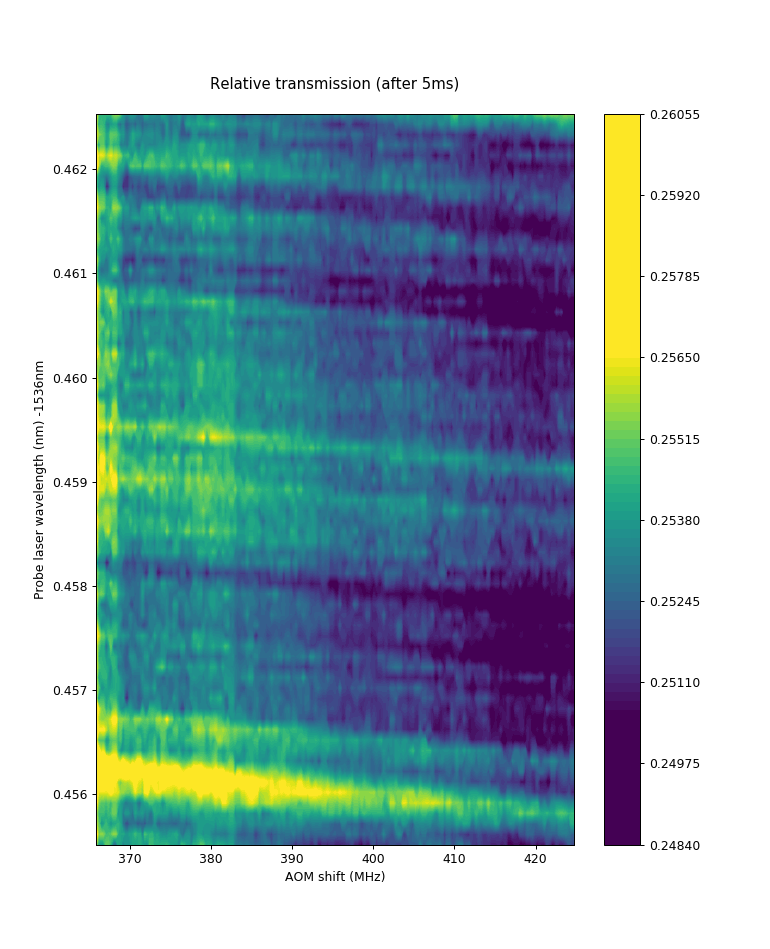

In [8]:
i_list = list(range(len(rids)))
x = freqs[0]
y = np.array(koheras_wl_lin["fity"]-1536)[i_list]
#y = (np.array(nm_to_Hz(koheras_wl_lin["fity"])-195.1e12)[i_list])/1e9

#z = (np.array(rts))[i_list,:]
z = (np.array(rts_0))[i_list,:]
#z = (np.array(rts_1))[i_list,:]
#z = (np.array(rts_1)-np.array(rts))[i_list,:]
#z = (np.array(rts_before))[i_list,:]
#z = (np.array(rts)-np.array(rts_before))[i_list,:]

#z = (np.array(S1s))[i_list,:]
#z = (np.array(S1s_before))[i_list,:]
#z = (np.array(S1s)-np.array(S1s_before))[i_list,:]

#z = (np.array(S2s))[i_list,:]
#z = (np.array(S1s_before))[i_list,:]
#z = (np.array(S1s)-np.array(S1s_before))[i_list,:]

#z = [z[row] - np.median(z[row]) for row in range(len(z))]


fig, ax = plt.subplots(figsize=(8.6, 10.6))

# filled contours (z[y_ind][x_ind]),  x and y should be sorted
vm = np.mean(z)
vmax = vm + 0.5*(np.max(z)-vm)
vmin= vm + 0.5*(np.min(z)-vm)
im = ax.contourf(x, y, z, 100, vmax=vmax, vmin=vmin)

# contour lines
#im2 = ax.contour(x, y, z, colors='k')

fig.colorbar(im, ax=ax)
ax.set_title("Relative transmission (after 5ms)\n")
ax.set_xlabel("AOM shift (MHz)")
ax.set_ylabel("Probe laser wavelength (nm) -1536nm")
#ax.set_ylim([0.472,0.488])
plt.show()

<IPython.core.display.Javascript object>


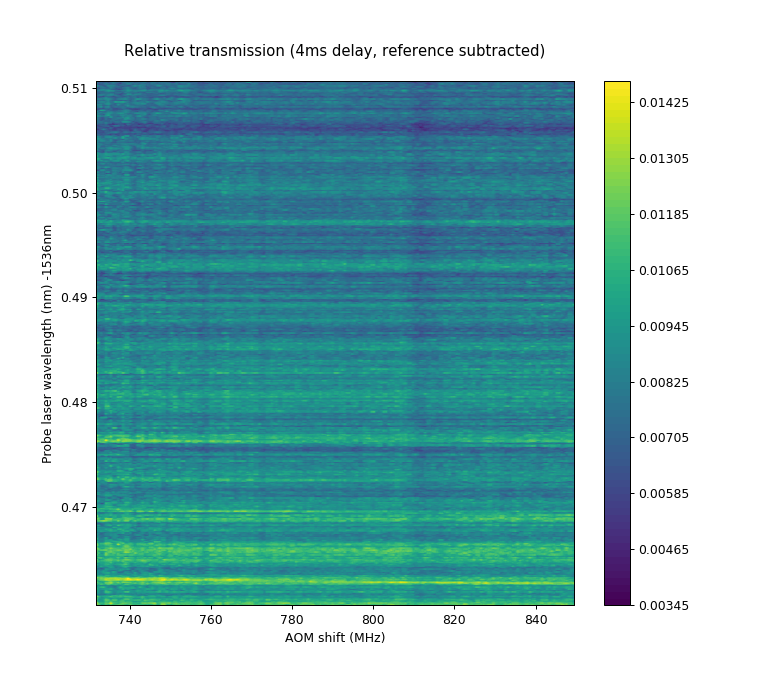

In [10]:
i_list = list(range(len(rids)))
x = 2*freqs[0]
y = np.array(koheras_wl_lin["fity"]-1536)[i_list]
#y = (np.array(nm_to_Hz(koheras_wl_lin["fity"])-195.1e12)[i_list])/1e9

z = (np.array(rts))[i_list,:]
#z = (np.array(rts_before))[i_list,:]
z = (np.array(rts)-np.array(rts_before))[i_list,:]

#z = [z[row] - np.median(z[row]) for row in range(len(z))]


fig, ax = plt.subplots(figsize=(8.6, 7.6))

# filled contours (z[y_ind][x_ind]),  x and y should be sorted
vm = np.mean(z)
vmax = vm + 1.0*(np.max(z)-vm)
vmin= vm + 1.0*(np.min(z)-vm)
im = ax.contourf(x, y, z, 100, vmax=vmax, vmin=vmin)

# contour lines
#im2 = ax.contour(x, y, z, colors='k')

fig.colorbar(im, ax=ax)
ax.set_title("Relative transmission (4ms delay, reference subtracted)\n")
ax.set_xlabel("AOM shift (MHz)")
ax.set_ylabel("Probe laser wavelength (nm) -1536nm")
#ax.set_ylim([0.472,0.488])
plt.show()

In [11]:
def contrast(x):
    return np.max(x) - np.min(x)

def avg_contrast(x, N=10, i_offset=0):
    return np.mean(x[i_offset:i_offset+N]) - np.mean(x[-N:])

<IPython.core.display.Javascript object>


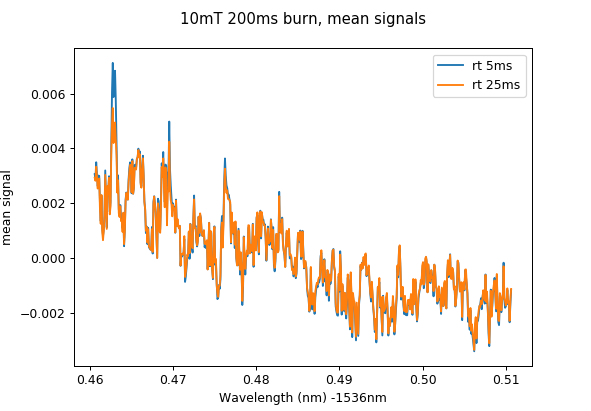

In [12]:
i_list = list(range(len(rids)))
x = freqs[0]
y = np.array(koheras_wl_lin["fity"]-1536)[i_list]
#y = (np.array(nm_to_Hz(koheras_wl_lin["fity"])-195.1e12)[i_list])/1e9

mean_rt = [np.mean(rts[i]) for i in i_list]
mean_rt_ref = [np.mean(rts_before[i]) for i in i_list]
mean_rt_ref_subtracted = [np.mean(rts[i]-rts_before[i]) for i in i_list]

mean_rt_0 = [np.mean(rts_0[i]) for i in i_list]
mean_rt_1 = [np.mean(rts_1[i]) for i in i_list]

mean_S1 = [np.mean(S1s[i]) for i in i_list]
mean_S1_ref = [np.mean(S1s_before[i]) for i in i_list]
mean_S1_ref_subtracted = [np.mean(S1s[i]-S1s_before[i]) for i in i_list]

mean_S2 = [np.mean(S2s[i]) for i in i_list]
mean_S2_ref = [np.mean(S2s_before[i]) for i in i_list]
mean_S2_ref_subtracted = [np.mean(S2s[i]-S2s_before[i]) for i in i_list]


mean_rt_0 = mean_rt_0 - np.mean(mean_rt_0)
mean_rt_1 = mean_rt_1 - np.mean(mean_rt_1)
mean_rt = mean_rt - np.mean(mean_rt)
mean_rt_ref = mean_rt_ref - np.mean(mean_rt_ref)



fig, ax = plt.subplots(figsize=(6.6, 4.6))

ax.plot(y, mean_rt_0, label="rt 5ms")
ax.plot(y, mean_rt_1, label="rt 25ms")
#ax.plot(y, mean_rt, label="rt 50ms")
#ax.plot(y, mean_rt_ref, label="rt ref (500ms)")
#ax.plot(y, mean_rt-mean_rt_ref, label="rt 50ms - ref")

#ax.plot(y, mean_S1+np.mean(mean_S1_ref)-np.mean(mean_S1), label="S1 4ms")
#ax.plot(y, mean_S1_ref, label="S1 ref (500ms)")
#ax.plot(y, mean_S1_ref_subtracted, label="S1 4ms - ref")

#ax.plot(y, mean_S2, label="S2 4ms")
#ax.plot(y, mean_S2_ref, label="S2 ref (500ms)")
#ax.plot(y, mean_S2_ref_subtracted, label="S2 4ms - ref")

ax.set_title("10mT 200ms burn, mean signals\n")
ax.set_ylabel("mean signal")
ax.set_xlabel("Wavelength (nm) -1536nm")
#ax.set_xlabel("Frequency (GHz) -195.1THz")
#ax.set_ylim([0.472,0.488])
ax.legend(loc="best")
plt.show()

<IPython.core.display.Javascript object>


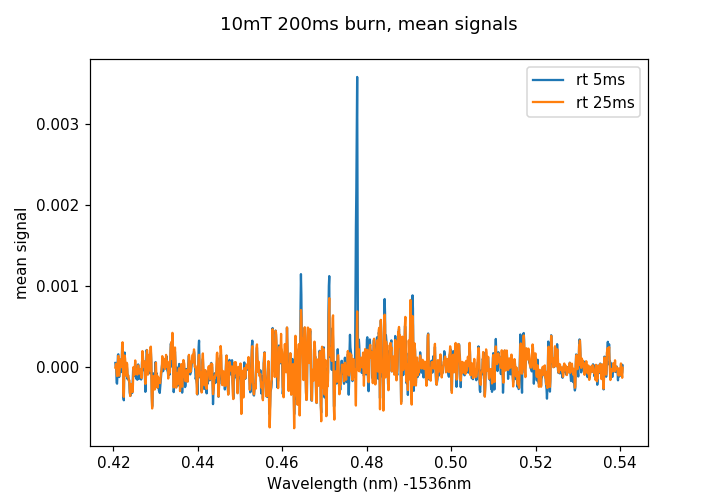

In [21]:
i_list = list(range(len(rids)))
x = freqs[0]
y = np.array(koheras_wl_lin["fity"]-1536)[i_list]
#y = (np.array(nm_to_Hz(koheras_wl_lin["fity"])-195.1e12)[i_list])/1e9

mean_rt = [np.std(rts[i]) for i in i_list]
mean_rt_ref = [np.std(rts_before[i]) for i in i_list]
mean_rt_ref_subtracted = [np.std(rts[i]-rts_before[i]) for i in i_list]

mean_rt_0 = [np.std(rts_0[i]) for i in i_list]
mean_rt_1 = [np.std(rts_1[i]) for i in i_list]

mean_S1 = [np.std(S1s[i]) for i in i_list]
mean_S1_ref = [np.std(S1s_before[i]) for i in i_list]
mean_S1_ref_subtracted = [np.std(S1s[i]-S1s_before[i]) for i in i_list]

mean_S2 = [np.std(S2s[i]) for i in i_list]
mean_S2_ref = [np.std(S2s_before[i]) for i in i_list]
mean_S2_ref_subtracted = [np.std(S2s[i]-S2s_before[i]) for i in i_list]


mean_rt_0 = mean_rt_0 - np.mean(mean_rt_0)
mean_rt_1 = mean_rt_1 - np.mean(mean_rt_1)
mean_rt = mean_rt - np.mean(mean_rt)
mean_rt_ref = mean_rt_ref - np.mean(mean_rt_ref)



fig, ax = plt.subplots(figsize=(6.6, 4.6))

ax.plot(y, mean_rt_0, label="rt 5ms")
ax.plot(y, mean_rt_1, label="rt 25ms")
#ax.plot(y, mean_rt, label="rt 50ms")
#ax.plot(y, mean_rt_ref, label="rt ref (500ms)")
#ax.plot(y, mean_rt-mean_rt_ref, label="rt 50ms - ref")

#ax.plot(y, mean_S1+np.mean(mean_S1_ref)-np.mean(mean_S1), label="S1 4ms")
#ax.plot(y, mean_S1_ref, label="S1 ref (500ms)")
#ax.plot(y, mean_S1_ref_subtracted, label="S1 4ms - ref")

#ax.plot(y, mean_S2, label="S2 4ms")
#ax.plot(y, mean_S2_ref, label="S2 ref (500ms)")
#ax.plot(y, mean_S2_ref_subtracted, label="S2 4ms - ref")

ax.set_title("10mT 200ms burn, mean signals\n")
ax.set_ylabel("mean signal")
ax.set_xlabel("Wavelength (nm) -1536nm")
#ax.set_xlabel("Frequency (GHz) -195.1THz")
#ax.set_ylim([0.472,0.488])
ax.legend(loc="best")
plt.show()

In [31]:
import csv
break
with open("mean_rt_800mT.csv", "w+", newline="") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar="\\", quoting=csv.QUOTE_MINIMAL)
    
    
    y = np.array(koheras_wl_lin["fity"])[i_list]
    #y = (np.array(nm_to_Hz(koheras_wl_lin["fity"])-195.1e12)[i_list])/1e9

    mean_rt = [np.mean(rts[i]) for i in i_list]
    mean_rt_ref = [np.mean(rts_before[i]) for i in i_list]
    
    for j in range(len(y)):
        csvwriter.writerow([
                "{:.4f}".format(y[j]),
                "{}".format(mean_rt_ref[j]),
                "{}".format(mean_rt[j])])

SyntaxError: 'return' outside function (<ipython-input-31-2c58914434d1>, line 2)